## 0. Problem Overview

### Short Description
- **Problem**: *[Provide a concise description of the problem being solved, including its structure and key elements.]*
- **Applications**: *[Mention real-world scenarios or domains where the problem is applicable, e.g., logistics, scheduling, etc.]*
- **Interpretations**: *[Briefly describe different ways the problem can be interpreted or modeled.]*
- **Complexity**: *[Summarize the computational complexity, e.g., NP-hardness, and challenges in solving the problem efficiently.]*

### Justification for the Choice of Instances
- *[Explain why the selected problem instances were chosen – e.g., benchmark relevance, diversity in size and structure, known optimal solutions, etc.]*

### Names of Chosen Instances
- *[List the names of the selected problem instances, e.g., nug12, tai20a, sko42, etc.]*

### Implementation Notes
- *[Describe key characteristics of your implementation: language, framework, notable optimizations, or structure. Mention any assumptions, simplifications, or features like modularity, extensibility, etc.]*


In [25]:
#TODO

## 1. Description of the Neighborhood Operators Used

### Neighborhood Operators
- **Operator(s) Used**: *[Describe the neighborhood operator(s), e.g., swap, insert, 2-opt, etc.]*
  - *[Explain how the operator modifies the current solution to generate a neighbor.]*

### Neighborhood Size
- **Size**: *[Provide the size of the neighborhood, either as a formula or exact number depending on the instance.]*
  - *[Mention whether the neighborhood is fixed-size or dynamic.]*
  - *[If applicable, include how neighborhood size scales with problem size.]*

In [26]:
#TODO

## 2. Comparison of the Performance of 5 Algorithms and Implemented Types of Neighborhoods on All Problem Instances – Plots

### 2.1 Quality
- **Metric**: Distance from the optimum *(specify the exact measure used)*.
- **Scenarios**:
  - Average case
  - Best case
  - *(Optional)* Worst case
- **Note**: Include standard deviations to assess result stability.


Current working directory: C:\Users\Uni\IdeaProjects\BIAM\plots


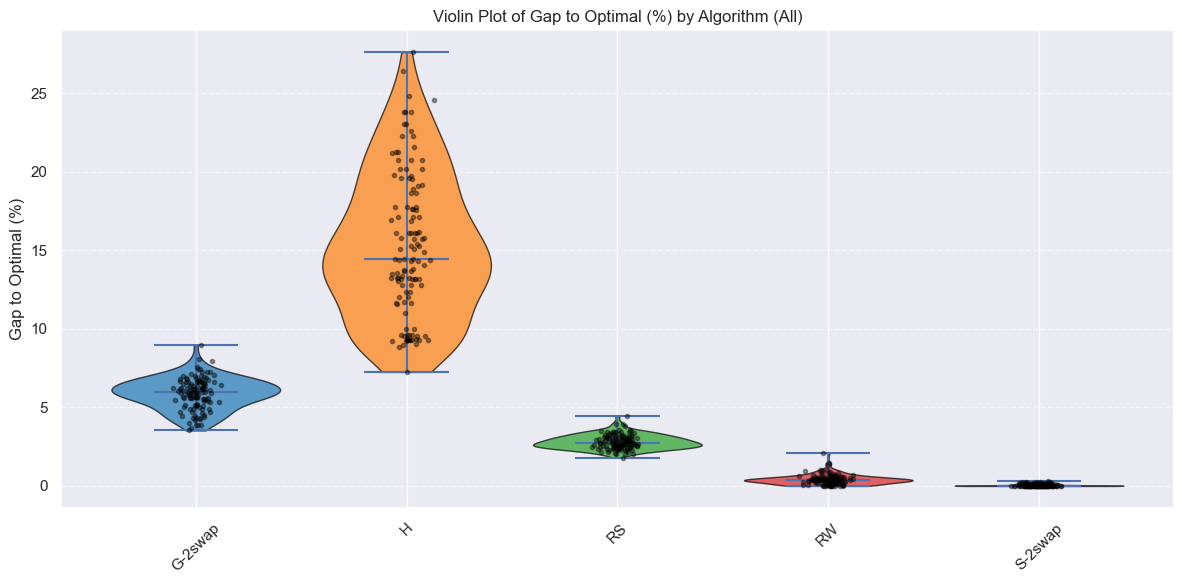

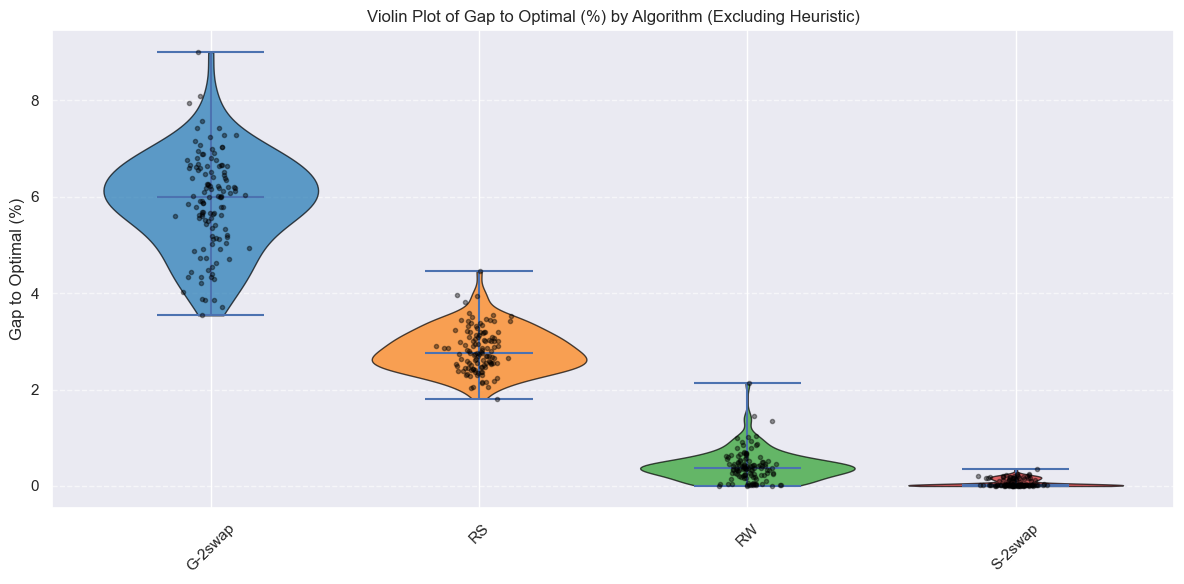

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Load Data
print("Current working directory:", os.getcwd())
experiment_df = pd.read_csv("../experiment_results.csv")
optimal_df = pd.read_csv("../optimal_data.csv")

# Clean instance names
experiment_df["Instance"] = experiment_df["Instance"].str.replace(".dat", "", regex=False).str.lower()
optimal_df["name"] = optimal_df["name"].str.lower()

# Merge data
merged_df = experiment_df.merge(
    optimal_df,
    left_on="Instance",
    right_on="name",
    how="left",
    suffixes=('', '_optimal')
)

# Compute performance metrics
merged_df["GapToOptimal(%)"] = ((merged_df["FinalFitness"] - merged_df["solution"]) / merged_df["solution"]) * 100
merged_df["GapToOptimal_Alt(%)"] = ((merged_df["FinalFitness"] - merged_df["solution"]) / merged_df["FinalFitness"]) * 100
merged_df["%OptimumAchieved"] = (merged_df["solution"] / merged_df["FinalFitness"]) * 100

# Violin Plot A: All Algorithms
def plot_violin_matplotlib(df, title):
    algorithms = sorted(df["Algorithm"].unique())
    data = [df[df["Algorithm"] == algo]["GapToOptimal(%)"] for algo in algorithms]

    fig, ax = plt.subplots(figsize=(12, 6))
    parts = ax.violinplot(data, showmeans=False, showmedians=True, showextrema=True, widths=0.8)

    # Color violins
    colors = plt.cm.tab10.colors
    for i, pc in enumerate(parts['bodies']):
        pc.set_facecolor(colors[i % len(colors)])
        pc.set_edgecolor('black')
        pc.set_alpha(0.7)

    # Overlay points
    for i, y in enumerate(data, start=1):
        x = np.random.normal(loc=i, scale=0.05, size=len(y))
        ax.plot(x, y, 'o', color='black', markersize=3, alpha=0.4)

    ax.set_xticks(np.arange(1, len(algorithms) + 1))
    ax.set_xticklabels(algorithms, rotation=45)
    ax.set_ylabel("Gap to Optimal (%)")
    ax.set_title(title)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Plot 1: All Algorithms
plot_violin_matplotlib(merged_df, "Violin Plot of Gap to Optimal (%) by Algorithm (All)")

# Plot 2: Excluding Heuristic (H)
filtered_df = merged_df[merged_df["Algorithm"] != "H"]
plot_violin_matplotlib(filtered_df, "Violin Plot of Gap to Optimal (%) by Algorithm (Excluding Heuristic)")


### 2.2 Running Time
- **Metric**: Average execution time
- **Note**: Include standard deviations to assess result stability.

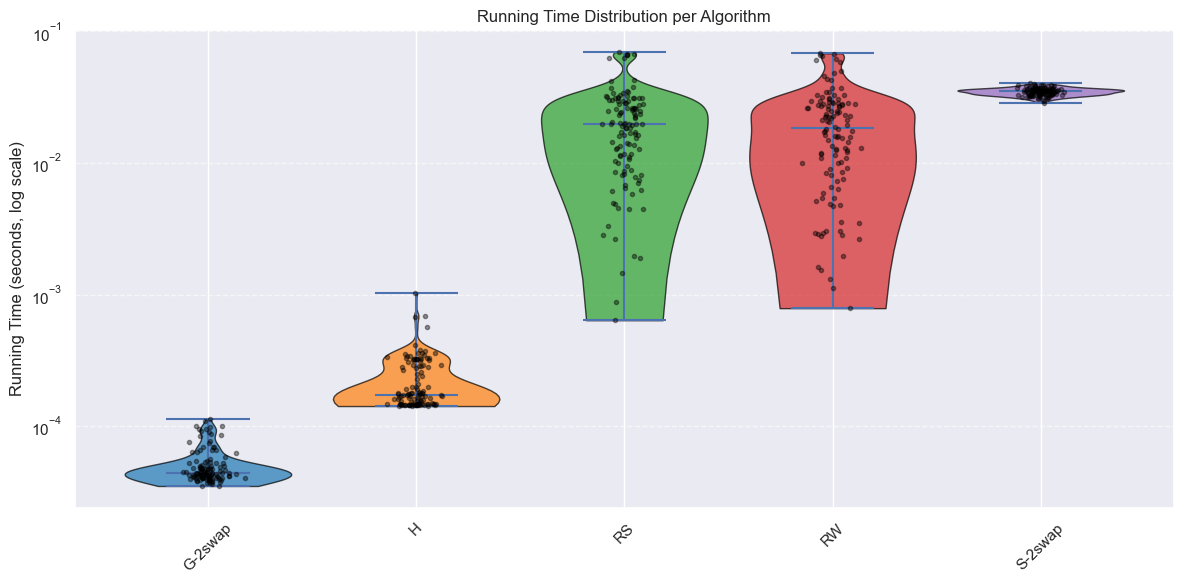

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure TimeSec column exists
merged_df["TimeSec"] = merged_df["TimeMs"] / 1000

# Prepare data
algorithms = merged_df["Algorithm"].unique()
algorithms.sort()
data = [merged_df[merged_df["Algorithm"] == algo]["TimeSec"] for algo in algorithms]

# Create violin plot
fig, ax = plt.subplots(figsize=(12, 6))
parts = ax.violinplot(
    data,
    showmeans=False,
    showmedians=True,
    showextrema=True,
    widths=0.8
)

# Optional: Color each violin differently
colors = plt.cm.tab10.colors
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i % len(colors)])
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Add individual data points
for i, algo_data in enumerate(data, start=1):
    y = algo_data
    x = np.random.normal(loc=i, scale=0.05, size=len(y))  # jitter for visibility
    ax.plot(x, y, 'o', color='black', markersize=3, alpha=0.4)

# Formatting
ax.set_xticks(np.arange(1, len(algorithms) + 1))
ax.set_xticklabels(algorithms, rotation=45)
ax.set_ylabel("Running Time (seconds, log scale)")
ax.set_yscale("log")
ax.set_title("Running Time Distribution per Algorithm")
ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


### 2.3 Efficiency of Algorithms
- **Metric**: Quality over time
- **Suggested Measure**: *(Propose and justify the chosen measure, e.g., inverse of normalized cost per time unit, or solution improvement per time unit)*
- **Note**: Include standard deviations to assess result stability.

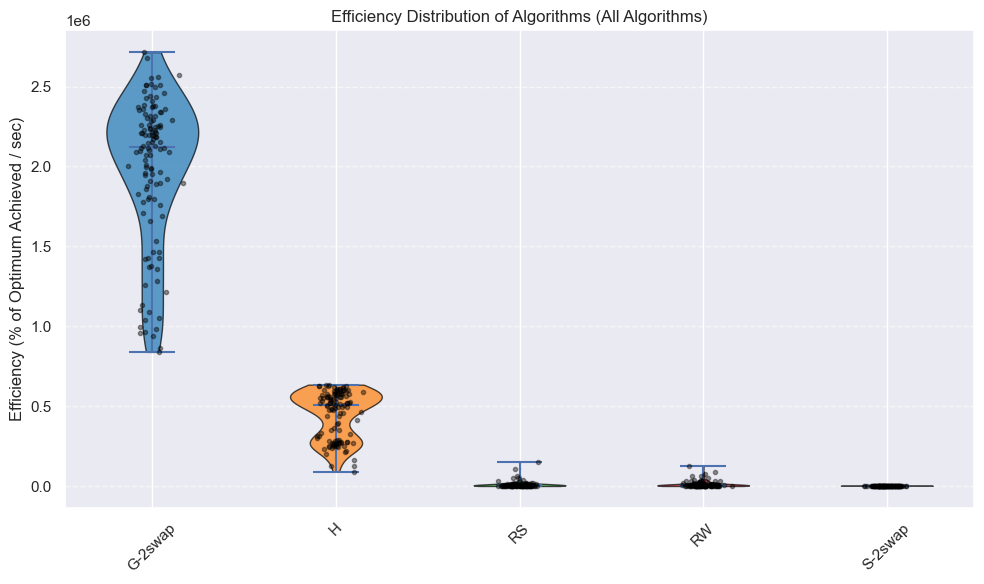

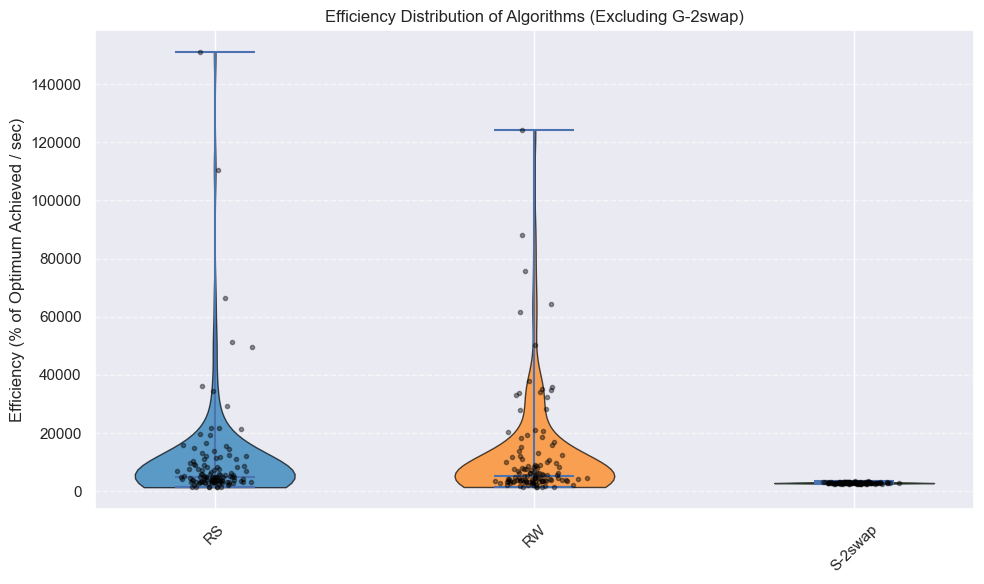

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# 🧠 Calculate efficiency
merged_df["Efficiency"] = merged_df["%OptimumAchieved"] / merged_df["TimeSec"]

def plot_efficiency_violin(dataframe, exclude_algos=None, title_suffix=""):
    # Optionally filter out excluded algorithms
    if exclude_algos:
        dataframe = dataframe[~dataframe["Algorithm"].isin(exclude_algos)]

    # Prepare data
    algorithms = sorted(dataframe["Algorithm"].unique())
    efficiency_data = [dataframe[dataframe["Algorithm"] == algo]["Efficiency"] for algo in algorithms]

    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))
    parts = ax.violinplot(efficiency_data, showmeans=False, showmedians=True, showextrema=True)

    # Color violins
    colors = plt.cm.tab10.colors
    for i, body in enumerate(parts['bodies']):
        body.set_facecolor(colors[i % len(colors)])
        body.set_edgecolor('black')
        body.set_alpha(0.7)

    # Overlay individual points
    for i, eff_values in enumerate(efficiency_data, start=1):
        x = np.random.normal(i, 0.05, size=len(eff_values))
        ax.plot(x, eff_values, 'o', color='black', markersize=3, alpha=0.4)

    # Customize
    ax.set_xticks(np.arange(1, len(algorithms) + 1))
    ax.set_xticklabels(algorithms, rotation=45)
    ax.set_ylabel("Efficiency (% of Optimum Achieved / sec)")
    ax.set_title(f"Efficiency Distribution of Algorithms {title_suffix}")
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# 📈 Plot 1: All algorithms
plot_efficiency_violin(merged_df, title_suffix="(All Algorithms)")

# 📉 Plot 2: Without G-2swap
plot_efficiency_violin(merged_df, exclude_algos=["G-2swap", "H"], title_suffix="(Excluding G-2swap)")


### 2.4 Number of Algorithm Steps (G, S)
- **Definition**: Step = changing the current solution
- **Metric**: Average number of steps
- **Note**: Include standard deviations to assess result stability.

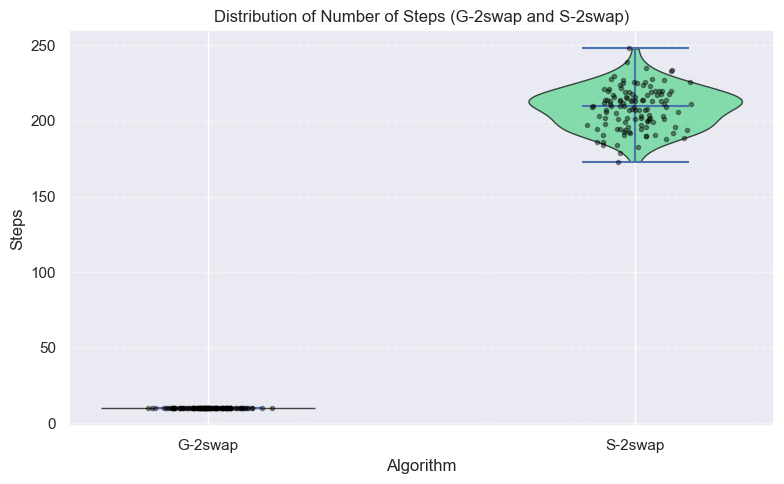

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Filter only G and S
gs_df = merged_df[merged_df["Algorithm"].isin(["G-2swap", "S-2swap"])]

# Prepare data
algos = ["G-2swap", "S-2swap"]
steps_data = [gs_df[gs_df["Algorithm"] == algo]["Steps"] for algo in algos]

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
parts = ax.violinplot(steps_data, showmeans=False, showmedians=True, showextrema=True)

# Color violins
colors = ["#5DADE2", "#58D68D"]
for i, body in enumerate(parts["bodies"]):
    body.set_facecolor(colors[i % len(colors)])
    body.set_edgecolor("black")
    body.set_alpha(0.7)

# Overlay data points
for i, step_vals in enumerate(steps_data, start=1):
    x = np.random.normal(i, 0.05, size=len(step_vals))
    ax.plot(x, step_vals, 'o', color='black', alpha=0.4, markersize=3)

# Customize
ax.set_xticks(np.arange(1, len(algos) + 1))
ax.set_xticklabels(algos)
ax.set_ylabel("Steps")
ax.set_xlabel("Algorithm")
ax.set_title("Distribution of Number of Steps (G-2swap and S-2swap)")
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 2.5 Number of Evaluated Solutions (G, S, RS, RW)
- **Definition**: Evaluated = visited and at least partially evaluated
- **Metric**: Average number of evaluated solutions
- **Note**: Include standard deviations to assess result stability.

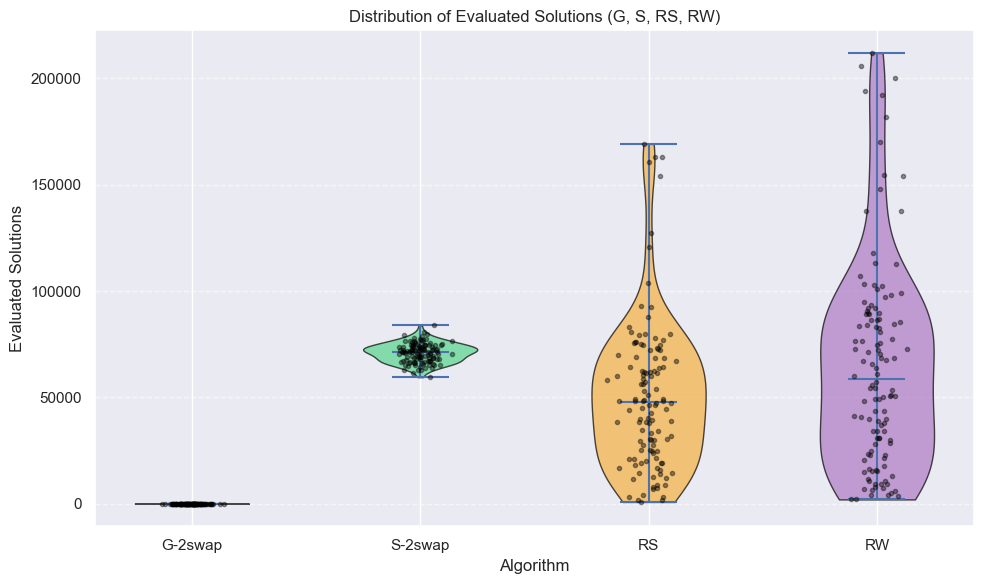

In [44]:
# Filter selected algorithms
eval_df = merged_df[merged_df["Algorithm"].isin(["G-2swap", "S-2swap", "RS", "RW"])]

# Prepare data
algos = ["G-2swap", "S-2swap", "RS", "RW"]
eval_data = [eval_df[eval_df["Algorithm"] == algo]["Evaluations"] for algo in algos]

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
parts = ax.violinplot(eval_data, showmeans=False, showmedians=True, showextrema=True)

# Color violins
colors = ["#5DADE2", "#58D68D", "#F5B041", "#AF7AC5"]
for i, body in enumerate(parts["bodies"]):
    body.set_facecolor(colors[i % len(colors)])
    body.set_edgecolor("black")
    body.set_alpha(0.7)

# Overlay data points
for i, eval_vals in enumerate(eval_data, start=1):
    x = np.random.normal(i, 0.05, size=len(eval_vals))
    ax.plot(x, eval_vals, 'o', color='black', alpha=0.4, markersize=3)

# Customize
ax.set_xticks(np.arange(1, len(algos) + 1))
ax.set_xticklabels(algos)
ax.set_ylabel("Evaluated Solutions")
ax.set_xlabel("Algorithm")
ax.set_title("Distribution of Evaluated Solutions (G, S, RS, RW)")
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## 3. G, S – Initial vs. Final Solution Quality

- **Plot**: Scatter plot of the quality of the initial solution (x-axis) vs. the quality of the final solution (y-axis)
- **Repetitions**: At least 200 (use small points)
- **Instances**: Select several interesting instances that show heterogeneity
- **Interpretation**:
  - Provide and interpret the correlation (e.g., Pearson’s r)
  - Discuss whether poor initial solutions still lead to good final solutions or not


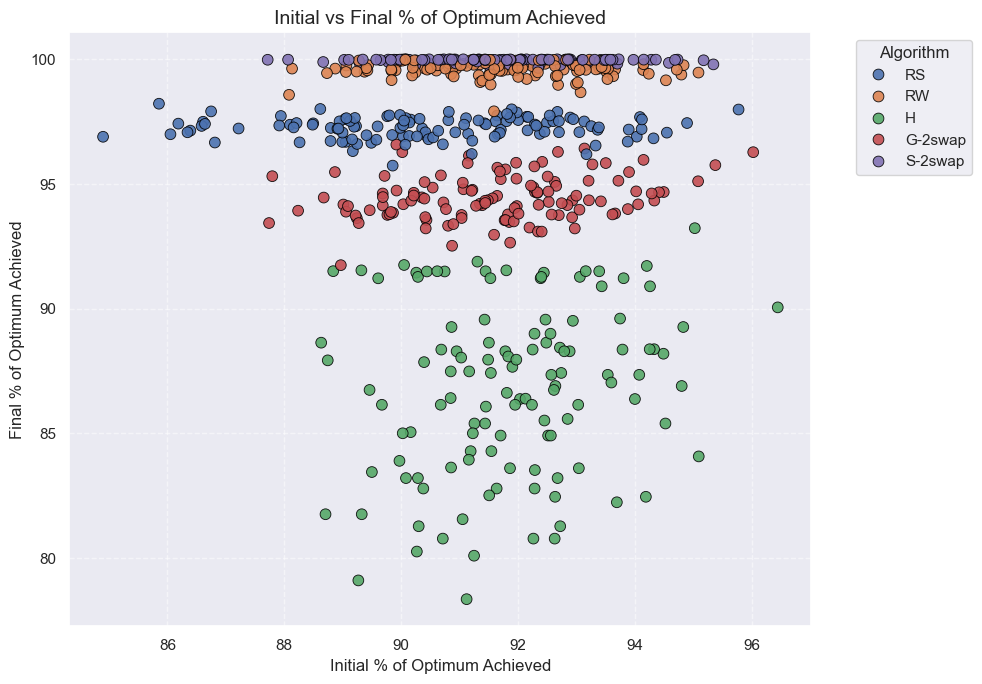

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🎯 Compute % of optimum achieved for initial and final solution
merged_df["%OptimumAchieved_Initial"] = (merged_df["solution"] / merged_df["InitialFitness"]) * 100
merged_df["%OptimumAchieved_Final"] = (merged_df["solution"] / merged_df["FinalFitness"]) * 100

# 🎨 Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=merged_df,
    x="%OptimumAchieved_Initial",
    y="%OptimumAchieved_Final",
    hue="Algorithm",
    alpha=0.9,
    s=60,
    edgecolor='black'
)

plt.title("Initial vs Final % of Optimum Achieved", fontsize=14)
plt.xlabel("Initial % of Optimum Achieved")
plt.ylabel("Final % of Optimum Achieved")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Algorithm", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## 4. G, S – Multi-Random Start Analysis

- **Plot**:
  - Horizontal axis: Number of restarts (up to at least 300)
  - Vertical axis: Average and best quality of solutions found so far
- **Instances**: Use two (or a few) selected instances
- **Interpretation**:
  - Analyze whether repeating the algorithm improves results
  - Determine the optimal number of restarts based on diminishing returns


In [33]:
#TODO

## 5. Similarity of Locally Optimal Solutions

### 5.1 Similarity to Each Other
- **Plot**: At least 100 points
  - x-axis: Quality
  - y-axis: Similarity between locally optimal solutions
- **Goal**: Evaluate how diverse the local optima are


In [34]:
#TODO

### 5.2 Similarity to the Global Optimum
- **Plot**: Same format as above
- Use similarity to the global optimum (or best local optimum if global is unknown)
- **Goal**: Analyze how close local optima are to the best-known solution

In [35]:
#TODO

## 6. Conclusions

- **General Insights**: Summarize broad observations from the experiments
- **Specific Findings**: Highlight key points from individual tests, comparisons, or plots
- **Impact**: Reflect on the implications for algorithm selection, parameter tuning, and neighborhood design


In [36]:
#TODO

## 7. Difficulties Encountered

- **Technical Issues**: Implementation bugs, performance bottlenecks, etc.
- **Experimental Challenges**: Instance selection, convergence detection, randomness handling
- **Interpretation Problems**: Noise in results, unexpected behaviors, or metric sensitivity


In [37]:
#TODO

## 8. Justification of Improvements and Suggestions

- **Justified Improvements**:
- Describe what was introduced and why
- Include observed or theoretical benefits

- **Suggestions for Future Work**:
    - Outline potential enhancements
    - Discuss expected impact on performance, quality, or efficiency


In [38]:
#TODO